In [ ]:
import os #os module lets you use functions dependent on the operating system
import time #time module lets you use functions related to time
import datetime #datetime module provides functions that help manipulate time and date
import numpy as np #numpy is used to perform mathematical operations
import pandas as pd #pandas library is used for data manipuulation

import matplotlib.pyplot as plt #matplot is used to create plots
import sklearn #is a library that provides a wide selection of tools and models for machine learning  

import tensorflow as tf #tensorflow is a framework used 
from tensorflow import keras #keras is an high level API from tensorflow used for developing ML solutions

from functools import partial #partial is a library used to create partial functions
import seaborn as sns #seaborn is a library used for making statistical graphics

from tensorflow.keras.preprocessing.image import ImageDataGenerator #allows the model to receive new variations of the image at each epoch
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D #importing layers from keras
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D #importing layers from keras
from tensorflow.keras.models import Model, Sequential #importing models from keras
from tensorflow.keras.optimizers import Adam #Adam optimiser is a speculative gradient descent method
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau #modelcheckpoint is a model used to define the checkpoints of a model. ReduceLROnPlateau is used to reduce learning rate when metric stops improving
from tensorflow.keras.utils import plot_model #plot_model is used to create various plot types
from keras.models import Sequential #sequential is a model used when there is exactly one input and one output
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout #importing layers from keras
from keras.utils import np_utils #importing the utils package
from pydrive.auth import GoogleAuth #pydrive is a wrapper api for google drive tasks. GoogleAuth is for google authentication
from pydrive.drive import GoogleDrive #GoogleDrive for good drive related operations
from google.colab import auth #authetication for google colab
from oauth2client.client import GoogleCredentials #model for google credentials
# Authenticate and create the PyDrive client.
auth.authenticate_user() 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1b1ulXC-QXCJZP3EEBWjEbGjC9Gk3euQC/view?usp=share_link'
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('my_goodreads_train.csv')

#reading the csv file
df = pd.read_csv('my_goodreads_train.csv')

print(df)


                                  user_id    book_id  \
0       1da3dcc13cf360b9ecb06251e86237535  182091851   
1       1ae436441b6153473ef907aed1006a159    1451461   
2       1aa5e9d859b0c0737f4b99a07edf19c88   13483572   
3       1940c22aba67c3d49ccd37891c52c9f51  131585171   
4       15e03534fccd0e7e1849d712ab9e44342  195643271   
...                                   ...        ...   
699995  1e40a946995fb1c851b4337d7c3326d0a  137889043   
699996  1eeee696a17b2113a5733f5bc1361717d   18920506   
699997  1121fa5da3a024775c2d6b3cf4b4098f8  144000061   
699998  14761ca19cf5e6ec4d6cea2e9bdae8eed  163023491   
699999  1cf32f3e040dc59913c44a5f14780e9d5   11759699   

                                review_id  rating  \
0       1c949b5dedf860514ec8b97ad158c9f4f       5   
1       112ee86a20d7e4308c0a054f8b03128cd       5   
2       1253729b67f301b75a0f26e85f6d6fb31       5   
3       1ae0005e94dce0dc5c18d6ae2b4a329ab       4   
4       1d8357d2abdcc656635c5459c1feec761       3   
...      

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops=set(stopwords.words('english')) #imports stopwords from NLTK and creates a set containing common english words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re #a pattern used to match and manipulate text
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

In [ ]:
df['review_text']=df['review_text'].apply(lambda z: remove_punctuations(z)) #it uses lambda function to remove all punctuations from text in every row

In [ ]:
import re
def remove_urls(text):
    url = re.compile(r'https\S+')
    return url.sub(r' ',text)

In [ ]:
df['review_text']=df['review_text'].apply(lambda z: remove_urls(z)) #apply is used to remove URLs

In [ ]:
def remove_non_alpha(text):        #removes all non-alphabetic characters
    alpha=re.compile(r'[^a-zA-Z]') #using re
    return alpha.sub(r' ',text)    #and the result contains only alphabetic characters and spaces

In [ ]:
df['review_text']=df['review_text'].apply(lambda z: remove_non_alpha(z)) #removes characters that are not a-zA-Z

In [ ]:
def remove_spoiler_alert(text):                                     #removes spoiler alerts from text
    return re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text) #and replaces any text between view and hide spoiler with an empty string

In [ ]:
df['review_text']=df['review_text'].apply(lambda z: remove_spoiler_alert(z)) #the lambda function likely removes any spoiler alerts present

In [ ]:
def remove(data):            #a regular expression is created that matches
    clean= re.compile(r"\n") #then substitutes them with an empty string 
    data=clean.sub(r'',data) #removing them from input
    return data

In [ ]:
df['review_text']=df['review_text'].apply(lambda z: remove(z)) #replaces each element of the column with the result of the function

In [ ]:
df1=df[['review_text','rating']] #multiple columns can be selected using double square brackets

In [ ]:
df1

,review_text,rating
0,I thought this was a very good historical fant...,5
1,Ive had this book recommended to me more than ...,5
2,Seriously You go and throw that twist into the...,5
3,Gosh Im still not recovering from the effing C...,4
4,stars rounded down I cant help it I just do...,3
...,...,...
699995,Beauty of the Beast is a slowburn romance that...,4
699996,I absolutely hate cliffhangers Dreamfever su...,5
699997,Actual rating,5
699998,spoiler alert Predictable Im reall...,4


In [ ]:
df1['review_text']=df1['review_text'].apply(lambda z: z.lower()) #converting text to lowercase using lambda function

<ipython-input-16-9a8d936165fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review_text']=df1['review_text'].apply(lambda z: z.lower()) #converting text to lowercase using lambda function


In [ ]:
df1.duplicated().sum() #checks for duplicated rows and returns a boolean series, which is then summed up to count the true values

8407

In [ ]:
df1=df1.drop_duplicates() #only left with unique rows dropping the duplicates

In [ ]:
df2=df1.copy() #creating copy of df1 as df2, changes won't affect df1

In [ ]:
STOPWORDS = set(stopwords.words('english'))                                         #remove english stopwords
def remove_stopwords(text):                                                         #applies function to 'review-text' column
    """custom function to remove the stopwords"""                                   #and assigns results back
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])  #to the same column

df2["review_text"] = df2["review_text"].apply(lambda text: remove_stopwords(text))
df2.head()

,review_text,rating
0,thought good historical fantasy set new york c...,5
1,ive book recommended decided give shot turns p...,5
2,seriously go throw twist story kills love seri...,5
3,gosh im still recovering effing cliffhanger bo...,4
4,stars rounded cant help dont connect theo much...,3


In [ ]:
df2.duplicated().sum()

2418

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() # Tfid vectorizer creates a matrix for the sentences based on word frequency/importance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #creates an instance
tfid_matrix=vectorizer.fit_transform(df2['review_text'])    #and then the column gets transformed by method into a matrix of Tfidf feature

In [ ]:
tfid_matrix #used to identify importance of each word, calculates term frequency * inverse document frequency for every word in the collection

<689175x547467 sparse matrix of type '<class 'numpy.float64'>'
	with 52862111 stored elements in Compressed Sparse Row format>

In [ ]:
y=df2['rating'] #assigning rating column to variable 'y'
X=tfid_matrix   #assigning value to matrix to 'X'

In [ ]:
X

<689175x547467 sparse matrix of type '<class 'numpy.float64'>'
	with 52862111 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
#We use truncated singular value decomposition as it works well with the sparse matrix tfid vectorization created
#We only reduce the dimensions to a 100 however better model performance is achieved for a higher number of components
#If we use the premium gpu on google collab pro we can do this and achieve optimal performance at around 400-500 components.

svd = TruncatedSVD(n_components=50) # reduce to 200 components

# Convert sparse matrix to Compressed Sparse Row (CSR) format
X_csr = csr_matrix(tfid_matrix)

# Apply Truncated SVD on the sparse matrix
X = svd.fit_transform(X_csr)

In [ ]:
y=df2['rating'].astype('int64')

In [ ]:
y

0         5
1         5
2         5
3         4
4         3
         ..
699994    5
699995    4
699996    5
699998    4
699999    5
Name: rating, Length: 689175, dtype: int64

In [ ]:
# Tensorflow works with labels starting from 0 while our labels start from 1
# We subtract 1 from each label so the one-hot encoding creates 5 classes instead of 6
#We reverse this when predicting on the test data to get the original labels back

y=y-1
y

0         4
1         4
2         4
3         3
4         2
         ..
699994    4
699995    3
699996    4
699998    3
699999    4
Name: rating, Length: 689175, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y,num_classes=5)


In [ ]:
y_onehot


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_onehot.shape

(689175, 5)

In [ ]:
y_val=y_onehot[:4000]
X_val=X[:4000]
y_train=y_onehot[4000:]
X_train=X[4000:]

In [ ]:
#LSTM NEEDS THIS SHAPE (rows,timesteps,features)
X_train_lstm=X_train.reshape(-1,1,50)
X_val_lstm=X_val.reshape(-1,1,50)

In [ ]:
#Baseline Naive bayes classifer
from sklearn.naive_bayes import GaussianNB #used for classification tasks and assumes that the features are normally distributed
from sklearn.metrics import accuracy_score #to evaluate the accuracy of classification models by comparing predicted and actual labels
model=GaussianNB()                              #predict the ratings for the validation data,
model.fit(X_train,(df2['rating'])[4000:])       #and calculates the accuracy score between the predicted ratings
y_pred=model.predict(X_val)                     #and the actual ratings for the first 4000 rows of the rating column in df2
accuracy_score(y_pred,(df2['rating'])[:4000])

0.385

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from gensim.models import Word2Vec
from tensorflow.keras.optimizers.legacy import Adam



# LSTM model architecture
model1 = Sequential()
model1.add(LSTM(units=5, input_shape=(1, 50), activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(units=5, activation='softmax'))

# Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm=model1
history=model_lstm.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val))


Epoch 1/5
21412/21412 [==============================] - 140s 6ms/step - loss: 1.2504 - accuracy: 0.4523 - val_loss: 1.2026 - val_accuracy: 0.4775
Epoch 2/5
21412/21412 [==============================] - 101s 5ms/step - loss: 1.2350 - accuracy: 0.4593 - val_loss: 1.1947 - val_accuracy: 0.4812
Epoch 3/5
21412/21412 [==============================] - 105s 5ms/step - loss: 1.2302 - accuracy: 0.4610 - val_loss: 1.1934 - val_accuracy: 0.4900
Epoch 4/5
21412/21412 [==============================] - 99s 5ms/step - loss: 1.2272 - accuracy: 0.4621 - val_loss: 1.1869 - val_accuracy: 0.4893
Epoch 5/5
21412/21412 [==============================] - 98s 5ms/step - loss: 1.2251 - accuracy: 0.4635 - val_loss: 1.1884 - val_accuracy: 0.4918


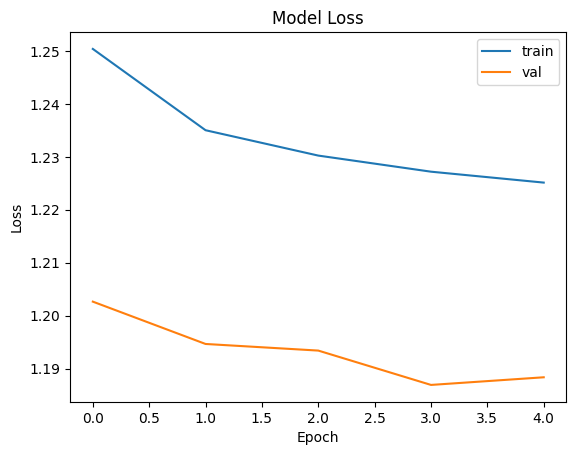

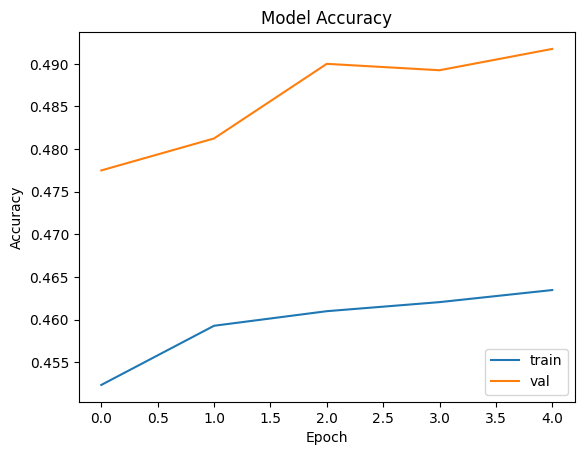

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#defining the function to plot the training and validation metrics
def plot_metrics(history):                                            #object containing training and validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                                           #plots
    plt.ylabel('Loss')                                                #loss on y-axis
    plt.xlabel('Epoch')                                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                                       #plots
    plt.ylabel('Accuracy')                                            #accuracy on y-axis
    plt.xlabel('Epoch')                                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

In [ ]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding mean and standard deviation to dataframe
mean = df_results.mean()
std = df_results.std()

#adding the mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.452344          0.477500       1.250378      1.202648
1              0.459283          0.481250       1.235022      1.194652
2              0.460992          0.490000       1.230233      1.193403
3              0.462054          0.489250       1.227192      1.186918
4              0.463471          0.491750       1.225131      1.188361
Mean           0.459629          0.485950       1.233591      1.193196
Std            0.004350          0.006213       0.010095      0.006211


In [ ]:
import tensorflow as tf
#3 layer
input_shape = (1, 50) #defining the input shape

#defining hidden layer sizes
hidden_dim_1 = 128
hidden_dim_2 = 64

output_dim = 5 #defining the number of output categories

model = tf.keras.models.Sequential([                            #defining model architecture
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(hidden_dim_1, activation='relu'),
    tf.keras.layers.Dense(hidden_dim_2, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #model compilation

#printing model summary
model.summary()
model_3layer=model

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 50)                0         
                                                                 
 dense_85 (Dense)            (None, 128)               6528      
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dense_87 (Dense)            (None, 5)                 325       
                                                                 
Total params: 15,109
Trainable params: 15,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model_3layer.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val)) #training model with 3 layers, 7 epochs, and validation

In [ ]:
#function to plot loss and accuracy metrics for training or validation
def plot_metrics(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                           #plots
    plt.ylabel('Loss')                                #loss on y-axis    
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                       #plots
    plt.ylabel('Accuracy')                            #accuracy on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

In [ ]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding mean and standard deviation to the dataframe
mean = df_results.mean()
std = df_results.std()

#adding mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

Epoch 1/5
21412/21412 [==============================] - 163s 8ms/step - loss: 1.2063 - accuracy: 0.4742 - val_loss: 1.1853 - val_accuracy: 0.4865
Epoch 2/5
21412/21412 [==============================] - 157s 7ms/step - loss: 1.1804 - accuracy: 0.4842 - val_loss: 1.1783 - val_accuracy: 0.4882
Epoch 3/5
21412/21412 [==============================] - 157s 7ms/step - loss: 1.1768 - accuracy: 0.4858 - val_loss: 1.1765 - val_accuracy: 0.4947
Epoch 4/5
21412/21412 [==============================] - 157s 7ms/step - loss: 1.1750 - accuracy: 0.4864 - val_loss: 1.1748 - val_accuracy: 0.5008
Epoch 5/5
21412/21412 [==============================] - 159s 7ms/step - loss: 1.1736 - accuracy: 0.4872 - val_loss: 1.1748 - val_accuracy: 0.4950
Epoch 1/5
21412/21412 [==============================] - 158s 7ms/step - loss: 1.1862 - accuracy: 0.4829 - val_loss: 1.1657 - val_accuracy: 0.5002
Epoch 2/5
21412/21412 [==============================] - 157s 7ms/step - loss: 1.1630 - accuracy: 0.4920 - val_loss: 1

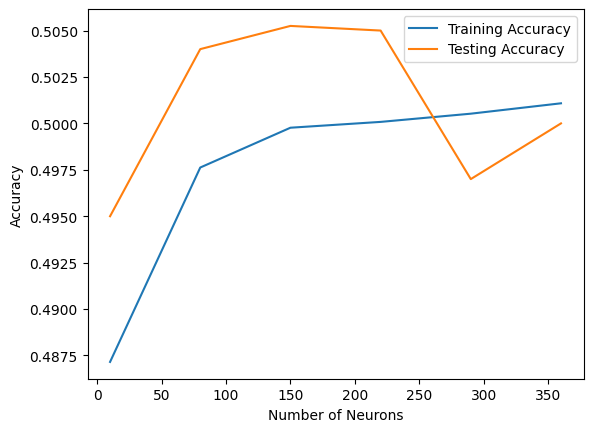

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for hidden_dim_1 to experiment with
neuron_range = np.arange(10, 400, 70)

# Initialize lists to store performance metrics for each value of hidden_dim_1
train_accs = []
test_accs = []

# Train the model for each value of hidden_dim_1 and record the performance metrics
for hidden_dim_1 in neuron_range:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(1,50)),
        tf.keras.layers.Dense(hidden_dim_1, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=5, verbose=1)
    train_accs.append(history.history['accuracy'][-1])
    test_accs.append(history.history['val_accuracy'][-1])

# Plot the performance metrics as a function of hidden_dim_1
plt.plot(neuron_range, train_accs, label='Training Accuracy')
plt.plot(neuron_range, test_accs, label='Testing Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/5
21412/21412 [==============================] - 86s 4ms/step - loss: 1.1720 - accuracy: 0.4865 - val_loss: 1.1581 - val_accuracy: 0.4935
Epoch 2/5
21412/21412 [==============================] - 86s 4ms/step - loss: 1.1529 - accuracy: 0.4949 - val_loss: 1.1524 - val_accuracy: 0.5050
Epoch 3/5
21412/21412 [==============================] - 84s 4ms/step - loss: 1.1467 - accuracy: 0.4975 - val_loss: 1.1481 - val_accuracy: 0.5082
Epoch 4/5
21412/21412 [==============================] - 81s 4ms/step - loss: 1.1428 - accuracy: 0.4992 - val_loss: 1.1500 - val_accuracy: 0.5055
Epoch 5/5
21412/21412 [==============================] - 82s 4ms/step - loss: 1.1393 - accuracy: 0.5006 - val_loss: 1.1479 - val_accuracy: 0.5052
Epoch 1/5
21412/21412 [==============================] - 81s 4ms/step - loss: 1.2347 - accuracy: 0.4586 - val_loss: 1.2140 - val_accuracy: 0.4737
Epoch 2/5
21412/21412 [==============================] - 82s 4ms/step - loss: 1.1971 - accuracy: 0.4769 - val_loss: 1.1937 -

Text(0.5, 1.0, 'Effect of Different Activation Functions')

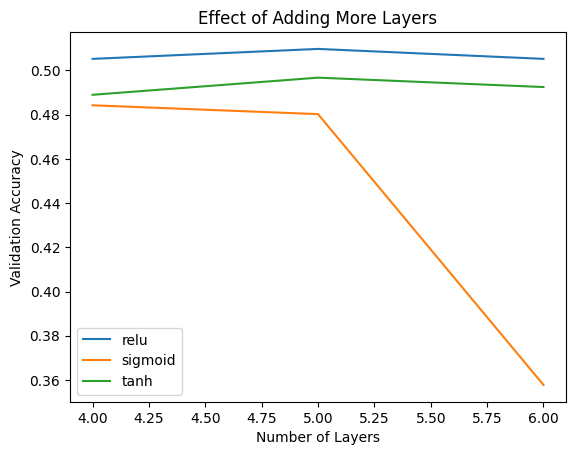

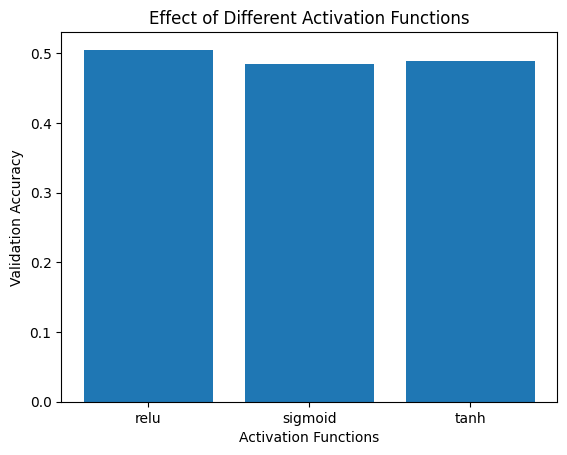

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten

# Define input shape and output dimension
input_shape=(1,50)
output_dim = 5

# Define hyperparameters
hidden_dim_1 = 128
hidden_dim_2 = 64
num_layers = [4, 5, 6]   # Vary the number of layers
activations = ['relu', 'sigmoid', 'tanh']  # Vary the activation functions

# Create a function to build the deep NN model
def build_model(num_layers, activation):
    model = tf.keras.models.Sequential()
    model.add(Flatten(input_shape=input_shape))
    for i in range(num_layers):
        model.add(Dense(hidden_dim_1, activation=activation))
    model.add(Dense(output_dim, activation='softmax'))
    return model

# Train and evaluate the models for different configurations
results = []
for nl in num_layers:
    for act in activations:
        model = build_model(nl, act)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train_lstm, y_train, epochs=5, validation_data=(X_val_lstm, y_val))
        results.append((nl, act, history.history['val_accuracy'][-1]))

# Plot the results of adding more layers
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
for act in activations:
    y = [r[2] for r in results if r[1] == act]
    ax.plot(num_layers, y, label=act)
ax.legend()
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Effect of Adding More Layers')

# Plot the results of different activation functions
fig, ax = plt.subplots()
y = [r[2] for r in results if r[0] == 4]   # Use 4 layers as an example
x_labels = [r[1] for r in results if r[0] ==4 ]
ax.bar(x_labels, y)
ax.set_xlabel('Activation Functions')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Effect of Different Activation Functions')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense #GRU comprises update and reset gates instead of using input

#defining model
model = Sequential()

# Add the embedding layer

#adding GRU layers
model.add(GRU(16, activation='relu', return_sequences=True,input_shape=(1,50)))
model.add(GRU(32, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu'))

#adding the output layer
model.add(Dense(5, activation='softmax'))

#compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#printing summary of model
model.summary()
model_GRU=model

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 16)             3264      
                                                                 
 gru_1 (GRU)                 (None, 1, 32)             4800      
                                                                 
 gru_2 (GRU)                 (None, 64)                18816     
                                                                 
 dense_89 (Dense)            (None, 5)                 325       
                                                                 
Total params: 27,205
Trainable params: 27,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model_GRU.fit(X_train_lstm,y_train,epochs=5,validation_data=(X_val_lstm,y_val)) #training GRU model on X_train_lstm and y_train for 7 epochs with validation data

Epoch 1/5
21412/21412 [==============================] - 164s 7ms/step - loss: 1.1952 - accuracy: 0.4774 - val_loss: 1.1776 - val_accuracy: 0.4882
Epoch 2/5
21412/21412 [==============================] - 150s 7ms/step - loss: 1.1728 - accuracy: 0.4873 - val_loss: 1.1646 - val_accuracy: 0.4958
Epoch 3/5
21412/21412 [==============================] - 149s 7ms/step - loss: 1.1681 - accuracy: 0.4890 - val_loss: 1.1618 - val_accuracy: 0.4952
Epoch 4/5
21412/21412 [==============================] - 149s 7ms/step - loss: 1.1649 - accuracy: 0.4908 - val_loss: 1.1613 - val_accuracy: 0.4947
Epoch 5/5
21412/21412 [==============================] - 149s 7ms/step - loss: 1.1628 - accuracy: 0.4909 - val_loss: 1.1560 - val_accuracy: 0.4972


In [ ]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding the mean and standard deviation to the dataframe
mean = df_results.mean()
std = df_results.std()

#adding the mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.477417          0.488250       1.195196      1.177645
1              0.487305          0.495750       1.172829      1.164578
2              0.488995          0.495250       1.168115      1.161788
3              0.490784          0.494750       1.164925      1.161314
4              0.490913          0.497250       1.162762      1.156021
Mean           0.487083          0.494250       1.172766      1.164269
Std            0.005601          0.003482       0.013098      0.008092


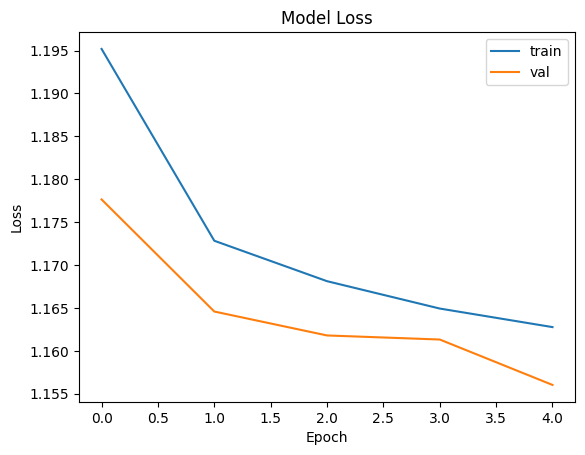

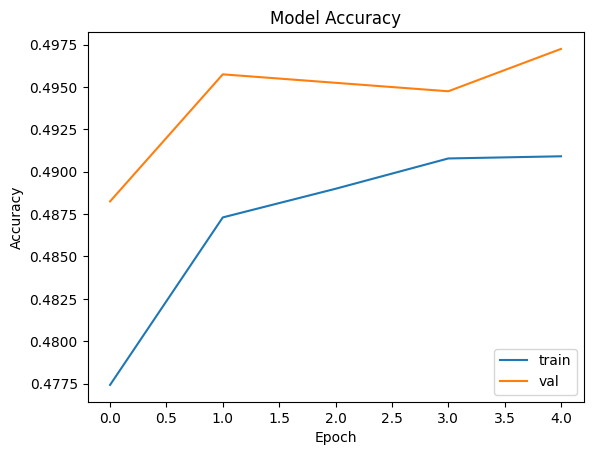

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#defining the function to plot the training and validation metrics
def plot_metrics(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')                           #plots
    plt.ylabel('Loss')                                #loss on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')                       #plots
    plt.ylabel('Accuracy')                            #accuracy on y-axis
    plt.xlabel('Epoch')                               #epoch on x-axis
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

plot_metrics(history)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1Bkpna7ikaq31wSSHLRnRtP2irZYZvVL6/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('my_goodreads_test.csv') 
 
df_test= pd.read_csv('my_goodreads_test.csv')
print(df)

                                  user_id    book_id  \
0       1da3dcc13cf360b9ecb06251e86237535  182091851   
1       1ae436441b6153473ef907aed1006a159    1451461   
2       1aa5e9d859b0c0737f4b99a07edf19c88   13483572   
3       1940c22aba67c3d49ccd37891c52c9f51  131585171   
4       15e03534fccd0e7e1849d712ab9e44342  195643271   
...                                   ...        ...   
699995  1e40a946995fb1c851b4337d7c3326d0a  137889043   
699996  1eeee696a17b2113a5733f5bc1361717d   18920506   
699997  1121fa5da3a024775c2d6b3cf4b4098f8  144000061   
699998  14761ca19cf5e6ec4d6cea2e9bdae8eed  163023491   
699999  1cf32f3e040dc59913c44a5f14780e9d5   11759699   

                                review_id  rating  \
0       1c949b5dedf860514ec8b97ad158c9f4f       5   
1       112ee86a20d7e4308c0a054f8b03128cd       5   
2       1253729b67f301b75a0f26e85f6d6fb31       5   
3       1ae0005e94dce0dc5c18d6ae2b4a329ab       4   
4       1d8357d2abdcc656635c5459c1feec761       3   
...      

In [ ]:
#training using the LSTM model if you want to run this
tfid_matrix_test = vectorizer.transform(df_test['review_text']) #creating a Tfidf matrix from test data reviews

In [ ]:
print(tfid_matrix_test) #printing tfidf matrix to test

  (0, 537455)	0.055845778460966854
  (0, 533054)	0.1121291519829232
  (0, 492505)	0.14546076011347744
  (0, 490919)	0.08883470905405359
  (0, 484467)	0.07158312202264037
  (0, 476500)	0.4648906405621071
  (0, 470955)	0.1800958382173912
  (0, 456241)	0.1377515165913999
  (0, 454936)	0.06846737489658289
  (0, 453646)	0.13725053470934598
  (0, 421098)	0.0594898914942439
  (0, 415915)	0.11364603716567459
  (0, 415644)	0.1251984915979144
  (0, 401924)	0.07657630010114191
  (0, 388563)	0.09232074855605882
  (0, 388019)	0.04687828154133226
  (0, 362794)	0.07023492738699783
  (0, 361095)	0.08846122932146679
  (0, 348298)	0.1197180262407003
  (0, 343444)	0.09250408879873893
  (0, 314060)	0.09804185932546192
  (0, 310831)	0.05264319493357202
  (0, 278147)	0.05160545489693473
  (0, 274090)	0.0976993520185538
  (0, 271151)	0.1361752280064136
  :	:
  (199999, 364969)	0.1400174132500063
  (199999, 316700)	0.15834928960814645
  (199999, 286129)	0.08800593309952774
  (199999, 285066)	0.079741592425943

In [ ]:
X_test_svd=svd.transform(csr_matrix(tfid_matrix_test)) #transforming test data using SVD

In [ ]:
X_test12 = X_test_svd.reshape(X_test_svd.shape[0],1,X_test_svd.shape[1]) #reshaping X_test_svd to 3D array

In [ ]:
#we can predict on the test set after reshaping as shown above using the fitted
#deep,shallow lstm or gru model
#we create a different shape when using the 1d cnn later on in the notebook 
y_pred=model_GRU.predict(X_test12) #predicting output using GRU model on test data

6250/6250 [==============================] - 18s 3ms/step


In [ ]:
y_pred=np.argmax(y_pred, axis=1) #converting y_pred to its highest index position

In [ ]:
y_pred=y_pred.reshape(-1,1) #reshapeing y_pred to a single column

In [ ]:
#reversing what we did to predict on the test data
y_pred=y_pred+1

In [ ]:
y_pred #predicted output or value from a model

array([[3],
       [5],
       [5],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
id=((df_test['review_id']).to_numpy()) #converting review_id column in df_test to numpy array

In [ ]:
id=id.reshape(-1,1) #reshaping id as a single column array

In [ ]:
pred=np.column_stack((id,y_pred)) #creating a new array by stacking id and y_pred

In [ ]:
dfpred = pd.DataFrame(pred, columns=['review_id', 'rating']) #creating a pandas DataFrame with columns "review_id" and "rating", using values from "pred"

In [ ]:
#we try 1D CNN with GloVe embeddings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
X=df2['review_text']
print(X[0])
y_val=y_onehot[:4000]
X_val=X[:4000]
y_train=y_onehot[4000:]
X_train=X[4000:]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) #fitting tokenizer only on train data

#calculating vocabulary size using a tokenizer
vocab_size = len(tokenizer.word_index)
vocab_size

thought good historical fantasy set new york city around though set nyc plot characterbased focusing small cast supporting characters two characters golem jinni nonhuman andor created see fair bit reflection human nature eyes plot little slow could wished slightly stronger writing kept thinking book written like shadow wind guy gavriel kay would blowing socks ill settle good instead author one ill definitely keeping eye


545554

In [ ]:
#Just to make sure TPU is running
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
#this checks for the presence of a TPU and sets up a distribution strategy accordingly, if a TPU is detected, it initializes the TPU system and sets up a TPUStrategy.
#if multiple GPUs are present, it sets up a MirroredStrategy to distribute computation across the GPUs. 
#if only one GPU is present, it uses the default strategy, if no TPU or GPU is present, it also uses the default strategy, which runs on CPU.
#the last line prints the number of replicas being used by the distribution strategy.

if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.5.246.234:8470']
Number of accelerators:  8


In [ ]:
# we fit the tokenizer only on the train data
train_sequence = tokenizer.texts_to_sequences(X_train)

In [ ]:
#padding to make sure all the sequences are the same length
train_sequence = pad_sequences(train_sequence, maxlen =100, padding = 'post')

In [ ]:
#converting texts to sequences and pad on the validation set
tokenizer.fit_on_texts(X_train)

val_sequence = tokenizer.texts_to_sequences(X_val)
val_sequence = pad_sequences(val_sequence, maxlen = 100, padding = 'post')

In [ ]:
#we use the 50 dimension glove embeddings here, there are 50,100,150,200 dimension options
#if we lack computing power (which we usually do on google collab unless pro is used) we can
#cut the dimensions down to 50 or 100 instead of the 300 shown here


embedding_dict={}
url='https://drive.google.com/file/d/1qcVVPf5XfzysczVX8ZuvrRFrLgAMjpDc/view?usp=share_link'
file_id = url.split('/')[-2]
!gdown --id $file_id
with open('glove.6B.50d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors 
print(embedding_dict)
        

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qcVVPf5XfzysczVX8ZuvrRFrLgAMjpDc
To: /content/glove.6B.50d.txt
100% 171M/171M [00:02<00:00, 62.5MB/s]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#creating an embedding matrix 
vocab_size_glove = vocab_size + 1
embedding_matrix = np.zeros((vocab_size_glove, 50)) # glove.6B.300d.txt

for word, i in tokenizer.word_index.items():
    if i > vocab_size_glove:
        continue
    
    emb_vec = embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

In [ ]:
embedding_matrix.shape #returns the shape of the array

(545555, 50)

In [ ]:
embedding_matrix #maps words or other discrete entities

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0076543 ,  0.93456   , -0.73189002, ..., -0.089847  ,
        -0.27223   , -0.0088736 ],
       [ 0.36807999,  0.20834   , -0.22318999, ..., -0.67236   ,
        -0.39708999,  0.25183001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D, Flatten
from tensorflow.keras.initializers import Constant #used as a baseline or reference point that doesn't change during the learning process
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
#Conv1D: preprocessing of 1D sedquential data, 
#MaxPooling: down-sampling feature maps, to reduce spatial dimensionality of an input, 
#Flatten: converts multidimensional array into 1D array

#using pretrained embeddings
model=Sequential()
model.add(Embedding(vocab_size_glove,
                   50, input_length=100,
                   embeddings_initializer=Constant(embedding_matrix),trainable=False))
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(Conv1D(64,3,activation='relu',padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(128,5,activation='relu',padding='same'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(128,5,activation='relu',padding='same'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(Adam(learning_rate = 1e-3),
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
model_cnn=model

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           27277750  
                                                                 
 conv1d_6 (Conv1D)           (None, 100, 64)           9664      
                                                                 
 conv1d_7 (Conv1D)           (None, 100, 64)           12352     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 50, 64)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 50, 128)           41088     
                                                     

In [ ]:
#training history with 5 epochs, 128 batch size, validation
history = model_cnn.fit(train_sequence,
                   y_train,
                   batch_size=128,
                   epochs=5,validation_data=(val_sequence,y_val))

Epoch 1/5
5353/5353 [==============================] - 188s 35ms/step - loss: 1.1547 - accuracy: 0.4922 - val_loss: 1.1365 - val_accuracy: 0.5058
Epoch 2/5
5353/5353 [==============================] - 188s 35ms/step - loss: 1.1432 - accuracy: 0.4979 - val_loss: 1.1366 - val_accuracy: 0.4972
Epoch 3/5
5353/5353 [==============================] - 189s 35ms/step - loss: 1.1351 - accuracy: 0.5014 - val_loss: 1.1185 - val_accuracy: 0.5170
Epoch 4/5
5353/5353 [==============================] - 188s 35ms/step - loss: 1.1277 - accuracy: 0.5054 - val_loss: 1.1189 - val_accuracy: 0.5070
Epoch 5/5
5353/5353 [==============================] - 188s 35ms/step - loss: 1.1227 - accuracy: 0.5077 - val_loss: 1.1161 - val_accuracy: 0.5145


In [ ]:
df_results = pd.DataFrame({'Training Accuracy': history.history['accuracy'],
                   'Testing Accuracy': history.history['val_accuracy'],
                   'Training Loss': history.history['loss'],
                   'Testing Loss': history.history['val_loss']})

#adding mean and standard deviation to the dataframe
mean = df_results.mean()
std = df_results.std()

#adding mean and standard deviation as a new row to the dataframe
df_results.loc['Mean'] = mean
df_results.loc['Std'] = std

#displaying dataframe
print(df_results)

      Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0              0.492201          0.505750       1.154658      1.136512
1              0.497924          0.497250       1.143198      1.136556
2              0.501397          0.517000       1.135075      1.118506
3              0.505420          0.507000       1.127749      1.118911
4              0.507735          0.514500       1.122696      1.116099
Mean           0.500935          0.508300       1.136675      1.125317
Std            0.006163          0.007817       0.012685      0.010296


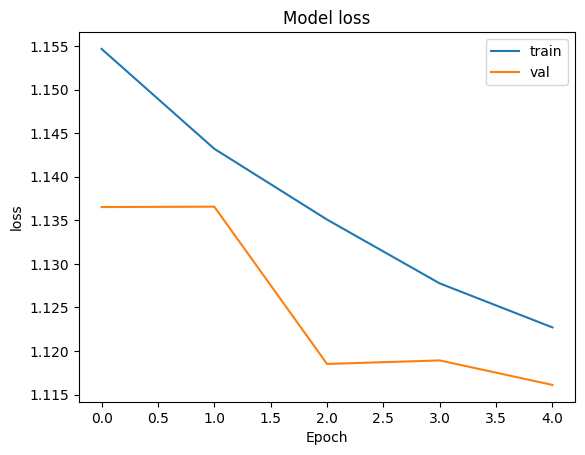

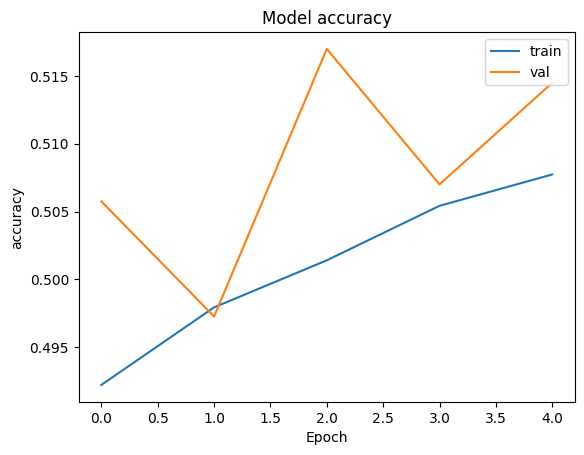

In [ ]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

#plotting training and validation loss against the epochs
plot_metrics(history, 'loss')

# plotting training and validation accuracy against the epochs
plot_metrics(history, 'accuracy')



In [ ]:
#executing the same preprocess done before
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1Bkpna7ikaq31wSSHLRnRtP2irZYZvVL6/view?usp=share_link'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('my_goodreads_test.csv') 
 
df_test= pd.read_csv('my_goodreads_test.csv')
print(df_test)

        Unnamed: 0                            user_id    book_id  \
0             2212  11f7623a30dd3f47258dd9a4c806f6850   10439467   
1           655187  1b700c4dfcecf272a3d18fea04d1a7f3a     129377   
2           483724  1ad43768c54d2c2c2da810cbf052a3fff  176699581   
3           322858  1f9214ec05446de0b96d8fe550d994baf   17792372   
4           393932  1071b2047c229084b25a0e1fd51e0c698   18499966   
...            ...                                ...        ...   
199995      865422  180e9adfbe8457960da3356a9d0a75cbe  112558842   
199996      237115  126a91e8c3a9507dfa6edc5ce7decc947   17542448   
199997      868869  1e89e6cc6a7c3924c8899957021861b39   11069568   
199998      651403  1a694003933611f14bef5b88383907b88   16024571   
199999      742558  1c169ccef89607b6d19571e2b65447f83   19383993   

                                review_id  \
0       16c32b9bb0142734c60f8b028f281c5dd   
1       1f86ec340856f1097c922d33aed48d4ea   
2       14a20b34f27611e45bd75e24de6a06324   
3  

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_test["review_text"] = df_test["review_text"].apply(lambda text: remove_stopwords(text))


In [ ]:
df_test['review_text']=df_test['review_text'].apply(lambda z: remove(z))

In [ ]:
import re
def remove_urls(text):
    url = re.compile(r'https\S+')
    return url.sub(r' ',text)

In [ ]:
df_test['review_text']=df_test['review_text'].apply(lambda z: remove_urls(z))

In [ ]:
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data
df_test['review_text']=df_test['review_text'].apply(lambda z: remove_punctuations(z))


In [ ]:
df_test['review_text']=df_test['review_text'].apply(lambda z: z.lower())

In [ ]:
def remove_non_alpha(text):
    alpha=re.compile(r'[^a-zA-Z]')
    return alpha.sub(r' ',text)

In [ ]:
df_test['review_text']=df_test['review_text'].apply(lambda z: remove_non_alpha(z))

In [ ]:
def remove_spoiler_alert(text):
    return re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text)

In [ ]:
df_test['review_text']=df_test['review_text'].apply(lambda z: remove_spoiler_alert(z))

In [ ]:
X_test=df_test['review_text']

In [ ]:
tokenizer.fit_on_texts(X_train)

test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence = pad_sequences(test_sequence, maxlen = 100, padding = 'post')


In [ ]:
y_pred=model_cnn.predict(test_sequence) #predicting for the given test data

6250/6250 [==============================] - 58s 9ms/step


In [ ]:
y_pred=np.argmax(y_pred, axis=1) #converting y_pred to its highest index position

In [ ]:
y_pred=y_pred.reshape(-1,1)

In [ ]:
y_pred=y_pred+1 #adding 1 which was substracted previously

In [ ]:
y_pred

array([[4],
       [5],
       [5],
       ...,
       [3],
       [4],
       [4]])

In [ ]:
id=((df_test['review_id']).to_numpy())

In [ ]:
id.shape

(200000,)

In [ ]:
id=id.reshape(-1,1)

In [ ]:
pred=np.column_stack((id,y_pred))

In [ ]:
pred

array([['16c32b9bb0142734c60f8b028f281c5dd', 4],
       ['1f86ec340856f1097c922d33aed48d4ea', 5],
       ['14a20b34f27611e45bd75e24de6a06324', 5],
       ...,
       ['17af2bb1902e2b7f6a5004e7bbe285139', 3],
       ['1e13fa3ce7e49dfd190bd0a02c36efe61', 4],
       ['15f7e3747bb4b66f81c14a42a8d6e2403', 4]], dtype=object)

In [ ]:
dfpred = pd.DataFrame(pred, columns=['review_id', 'rating'])

In [ ]:
dfpred['rating'].value_counts()

4    97762
5    60065
3    34260
1     5733
2     2180
Name: rating, dtype: int64

In [ ]:
dfpred.to_csv('predictionsgoodread_glove.csv', index=False) #exporting csv file to upload in Kaggle